### Import Dataset

In [37]:
import pandas as pd
import numpy as np 

In [38]:
test_pd = pd.read_csv("../datasets/fashion/fashion-mnist_test.csv")
train_pd = pd.read_csv("../datasets/fashion/fashion-mnist_train.csv")

### Pre Process Data

In [39]:
from tensorflow.keras.utils import to_categorical

test_label = test_pd["label"].to_numpy()
test = test_pd.drop(columns="label").to_numpy()
train_label = train_pd["label"].to_numpy()
train = train_pd.drop(columns="label").to_numpy()

train = train / 255
test = test / 255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

train = train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

print(train.shape, train_label.shape, train_label[0])

(60000, 28, 28, 1) (60000, 10) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define Model

In [40]:
import keras

model = keras.Sequential([])
model.add(keras.layers.Conv2D(64, kernel_size=(5,5), strides=[1,1], padding="valid", input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=[2,2]))

model.add(keras.layers.Conv2D(64, kernel_size=(4,4), strides=[1,1] , padding="valid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=[2,2]))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=[1,1] , padding="valid"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=[2,2]))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 9, 9, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,618 (533.66 KB)

 Trainable params: 136,298 (532.41 KB)

 Non-trainable params: 320 (1.25 KB)

In [41]:
history = model.fit(train, train_label, batch_size=128, epochs=10, validation_data=(test, test_label))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 179ms/step - accuracy: 0.6831 - loss: 0.8931 - val_accuracy: 0.8393 - val_loss: 0.4548
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.8652 - loss: 0.3865 - val_accuracy: 0.8818 - val_loss: 0.3281
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 194ms/step - accuracy: 0.8835 - loss: 0.3372 - val_accuracy: 0.8965 - val_loss: 0.2914
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.9004 - loss: 0.2884 - val_accuracy: 0.8674 - val_loss: 0.3430
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 213ms/step - accuracy: 0.9049 - loss: 0.2691 - val_accuracy: 0.8880 - val_loss: 0.3199
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.9114 - loss: 0.2497 - val_accuracy: 0.8909 - val_loss: 0.2901
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.9190 - loss: 0.2262 - val_accuracy: 0.9027 - val_loss: 0.2708
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 208ms/step - accuracy: 0.9225 - loss:

In [ ]:
model.evaluate(test, test_label)

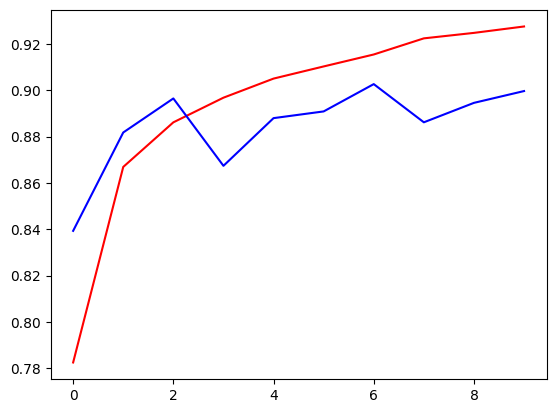

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red")
plt.plot(history.history["val_accuracy"],  color="blue")
plt.show()